# K-MEANS CLUSTER 2,3 DAN 4

In [1]:
%pip install pymysql
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Bagian Awal: Ambil dan Gabungkan Data

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="postgreependat2-pendat4.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_4T2SWDdsuTxisd9TzFu",
        database="defaultdb",
        port=24915
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysqlpendat23-pendat4.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_QaQiHV_Bc5n2tLGZIlj",
        database="defaultdb",
        port=24915
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          49.0         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          16.0         20.0          48.0         34.0
 13     Iris-setosa           1.4     

Kode ini dirancang untuk mengambil data dari dua sistem basis data yang berbeda, yaitu PostgreSQL dan MySQL, lalu menggabungkannya menjadi satu tabel menggunakan Pandas. Beberapa library yang digunakan dalam proses ini antara lain psycopg2 untuk koneksi ke PostgreSQL, pymysql untuk koneksi ke MySQL, pandas untuk manipulasi data dalam bentuk DataFrame, dan numpy yang sebenarnya tidak digunakan langsung dalam kode ini.

Fungsi get_pg_data() bertugas mengambil data dari tabel sepal_postgresql di database PostgreSQL. Fungsi ini membuka koneksi menggunakan kredensial tertentu, menjalankan perintah SELECT * FROM sepal_postgresql, lalu hasilnya diubah menjadi DataFrame Pandas dengan mengambil nama-nama kolom dari metadata query.

Dengan cara serupa, fungsi get_mysql_data() mengambil data dari tabel petalmysql yang ada di database MySQL. Prosesnya juga mencakup koneksi ke server, eksekusi query SELECT * FROM petalmysql, dan konversi hasil query menjadi DataFrame.

Data dari kedua sumber disimpan masing-masing ke dalam df_postgresql dan df_mysql. Diasumsikan bahwa kedua DataFrame ini memiliki kolom yang sama, yaitu id dan class, yang digunakan sebagai kunci untuk proses penggabungan. Penggabungan dilakukan dengan fungsi pd.merge() dari Pandas menggunakan parameter on=["id", "class"] dan how="inner", artinya hanya baris yang cocok di kedua DataFrame berdasarkan kolom tersebut yang akan digabungkan.

Hasil akhirnya adalah DataFrame baru bernama df_merged yang memuat gabungan informasi dari kedua tabel. Data ini kemudian ditampilkan ke layar dengan fungsi print(df_merged.to_string(index=False)) agar hasilnya rapi dan mudah dibaca karena indeks tidak ditampilkan.

Secara keseluruhan, kode ini memungkinkan penggabungan data sepal dan petal dari dua basis data berbeda ke dalam satu struktur data yang konsisten untuk keperluan analisis lanjutan seperti visualisasi, reduksi dimensi, atau teknik data mining lainnya.

## Data Asli

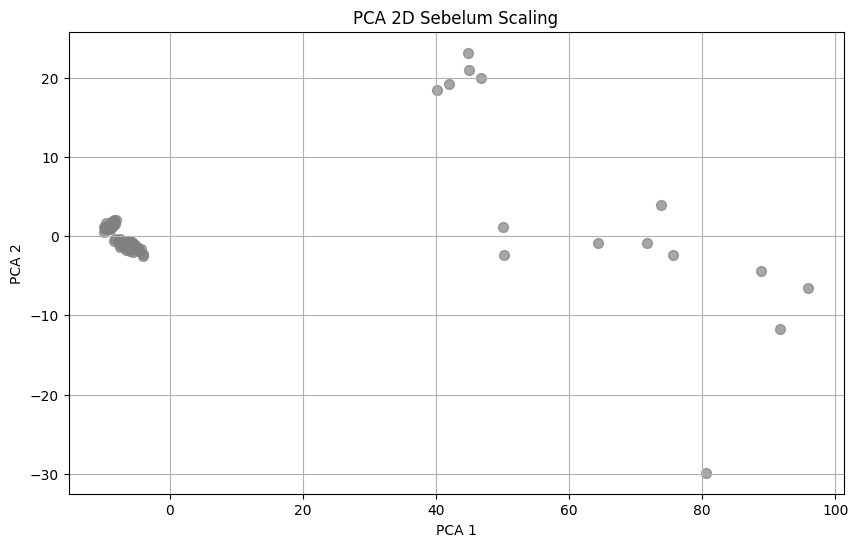

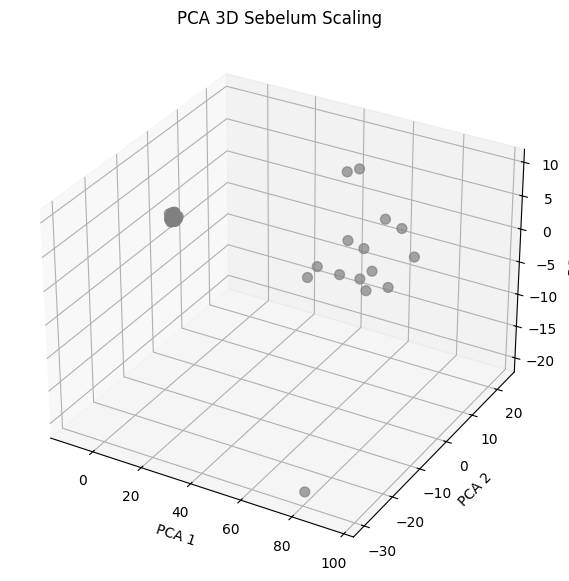

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ambil fitur numerik mentah (tanpa scaling)
features_raw = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah
pca_raw = PCA(n_components=2)
pca_2d_raw = pca_raw.fit_transform(features_raw)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_raw[:, 0], pca_2d_raw[:, 1], c='gray', s=50, alpha=0.7)
plt.title("PCA 2D Sebelum Scaling")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

pca_raw_3d = PCA(n_components=3)
pca_3d_raw = pca_raw_3d.fit_transform(features_raw)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_raw[:, 0], pca_3d_raw[:, 1], pca_3d_raw[:, 2],
           c='gray', s=50, alpha=0.7)

ax.set_title("PCA 3D Sebelum Scaling")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


Kode ini digunakan untuk menerapkan Analisis Komponen Utama (PCA) pada data mentah (tanpa normalisasi) dan menyajikan hasilnya dalam bentuk visualisasi dua dimensi (2D) dan tiga dimensi (3D) menggunakan matplotlib.

Pertama, kode mengimpor PCA dari sklearn.decomposition untuk melakukan reduksi dimensi, serta pyplot dari matplotlib untuk membuat grafik. Data yang dianalisis diambil dari df_merged, yaitu DataFrame gabungan dari dua sumber data sebelumnya (PostgreSQL dan MySQL), yang berisi fitur-fitur iris. Sebelum analisis PCA dilakukan, kolom 'id' dan 'class' dihapus karena keduanya bukan variabel numerik dan tidak relevan untuk proses komputasi PCA.

Reduksi dimensi pertama dilakukan ke dua komponen utama menggunakan PCA(n_components=2). Hasil transformasi disimpan dalam variabel pca_2d_raw. Karena data yang digunakan masih dalam bentuk mentah (belum dinormalisasi), proses PCA ini mencerminkan pola asli dari data awal. Hasilnya divisualisasikan dalam scatter plot dua dimensi dengan warna abu-abu dan transparansi (alpha=0.7) untuk menjaga keterbacaan saat titik-titik saling bertumpukan.

Selanjutnya, dilakukan reduksi ke tiga dimensi menggunakan PCA(n_components=3), dan hasilnya disimpan ke dalam pca_3d_raw. Visualisasi 3D kemudian dibuat menggunakan objek Axes3D dari matplotlib, menampilkan sebaran data berdasarkan tiga komponen utama dari hasil PCA. Grafik ini membantu memperlihatkan bentuk dan struktur data mentah dalam ruang tiga dimensi.

Visualisasi ini berguna sebagai langkah awal eksplorasi data sebelum masuk ke tahap analisis lanjutan, seperti klasifikasi atau clustering. Melalui proyeksi 2D dan 3D, kita dapat mengamati apakah terdapat kecenderungan pengelompokan atau pola pemisahan alami di dalam data, bahkan sebelum dilakukan proses normalisasi atau teknik preprocessing lainnya.



## Data Normalisasi

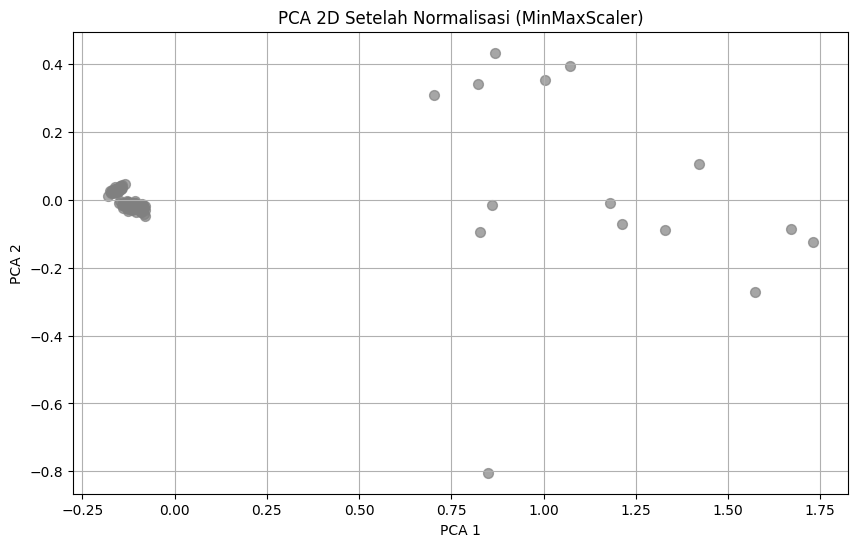

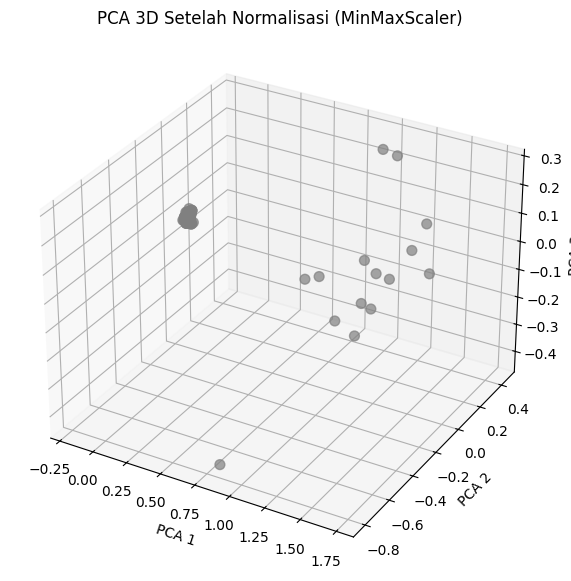

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # untuk 3D plot

# Ambil fitur numerik
features_raw = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_raw)

# PCA 2D setelah normalisasi
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(normalized_features)

# Visualisasi PCA 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], c='gray', s=50, alpha=0.7)
plt.title("PCA 2D Setelah Normalisasi (MinMaxScaler)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# PCA 3D setelah normalisasi
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(normalized_features)

# Visualisasi PCA 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_data[:, 0], pca_3d_data[:, 1], pca_3d_data[:, 2],
           c='gray', s=50, alpha=0.7)

ax.set_title("PCA 3D Setelah Normalisasi (MinMaxScaler)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


Kode ini berfungsi untuk melakukan normalisasi data menggunakan MinMaxScaler, kemudian menerapkan Principal Component Analysis (PCA) guna mereduksi dimensi data menjadi dua dan tiga dimensi, serta menampilkannya dalam bentuk visualisasi.

Langkah pertama dimulai dengan mengambil fitur numerik dari DataFrame df_merged, yaitu hasil gabungan data dari PostgreSQL dan MySQL. Kolom 'id' dan 'class' dihapus karena tidak termasuk dalam fitur numerik yang relevan untuk analisis PCA.

Setelah itu, proses normalisasi dilakukan menggunakan MinMaxScaler. Teknik ini mengubah skala setiap fitur menjadi berada dalam rentang 0 hingga 1. Normalisasi sangat penting karena PCA bekerja berdasarkan variansi antar fitur, dan jika skala fitur berbeda-beda, hasil PCA bisa menjadi bias.

Data yang sudah dinormalisasi kemudian direduksi dimensinya ke dalam dua komponen utama menggunakan PCA(n_components=2). Hasil transformasi ini disimpan dalam pca_2d_data, lalu divisualisasikan dalam bentuk scatter plot dua dimensi menggunakan matplotlib. Visualisasi dibuat dengan titik-titik berwarna abu-abu dan transparansi (alpha=0.7) agar distribusinya terlihat jelas tanpa saling menutupi.

Selanjutnya, PCA juga diterapkan untuk mereduksi data ke tiga dimensi dengan PCA(n_components=3), dan hasilnya disimpan dalam pca_3d_data. Visualisasi dilakukan dalam bentuk scatter plot tiga dimensi menggunakan Axes3D dari matplotlib, yang menampilkan penyebaran data berdasarkan tiga komponen utama hasil transformasi PCA setelah normalisasi.

Visualisasi dua dan tiga dimensi ini sangat bermanfaat untuk eksplorasi data awal. Dengan cara ini, kita bisa mengamati apakah terdapat pola atau kemungkinan terbentuknya kelompok (cluster) dalam data. Proses normalisasi sebelum PCA membuat hasil representasi lebih akurat dan mencerminkan struktur asli data dengan lebih baik.

## Preprocessing dan Reduksi Dimensi

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# StandardScaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(features)
standard_pca = PCA(n_components=2)
standard_reduced = standard_pca.fit_transform(standard_scaled)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(features)
minmax_pca = PCA(n_components=2)
minmax_reduced = minmax_pca.fit_transform(minmax_scaled)


In [6]:
print(standard_scaled)
print("-----------------")
print(minmax_scaled)

[[-4.73363549e-01 -4.97374965e-01 -3.68511713e-01 -2.61625331e-01]
 [ 5.35724098e-01 -9.34915347e-02  2.25716415e+00  2.88881602e+00]
 [-4.81372181e-01 -4.97374965e-01 -3.92435867e-01 -2.97290705e-01]
 [ 6.15810419e-01  3.94534277e+00  2.07773300e+00  3.00770060e+00]
 [-4.73363549e-01 -4.97374965e-01 -3.74492752e-01 -2.49736873e-01]
 [-4.49337653e-01 -4.52499028e-01 -3.50568598e-01 -2.14071499e-01]
 [-4.73363549e-01 -4.74936996e-01 -3.98416905e-01 -2.73513789e-01]
 [-4.65354917e-01 -4.97374965e-01 -3.74492752e-01 -2.73513789e-01]
 [-4.73363549e-01 -4.97374965e-01 -4.10378982e-01 -3.32956079e-01]
 [-4.65354917e-01 -5.19812933e-01 -3.80473790e-01 -3.09179163e-01]
 [-4.65354917e-01 -4.97374965e-01 -3.50568598e-01 -2.37848415e-01]
 [ 6.95896740e-01  3.94534277e+00  2.19735377e+00  3.36435434e+00]
 [-4.73363549e-01 -5.19812933e-01 -3.86454829e-01 -3.21067621e-01]
 [-4.97389445e-01 -5.19812933e-01 -4.16360021e-01 -3.21067621e-01]
 [-4.89380813e-01 -4.97374965e-01 -3.26644445e-01 -2.02183041e

Kode ini bertujuan untuk membandingkan dua metode normalisasi data—yaitu StandardScaler dan MinMaxScaler—dalam konteks penerapan Principal Component Analysis (PCA) untuk mereduksi dimensi data numerik, serta menganalisis bagaimana masing-masing metode memengaruhi hasil representasi data.

Langkah awal dilakukan dengan mengekstrak fitur numerik dari DataFrame df_merged, hasil penggabungan data dari PostgreSQL dan MySQL. Kolom 'id' dan 'class' dihilangkan karena bukan bagian dari fitur numerik yang relevan untuk PCA, yang hanya bekerja pada data numerik.

Selanjutnya, dua pendekatan normalisasi diterapkan:

StandardScaler
Metode ini melakukan standardisasi dengan mengubah distribusi setiap fitur agar memiliki nilai rata-rata nol dan standar deviasi satu. Hasil transformasi disimpan dalam variabel standard_scaled. Setelah proses ini, PCA dengan dua komponen utama dijalankan menggunakan PCA(n_components=2), dan hasilnya disimpan dalam standard_reduced.

MinMaxScaler
Normalisasi menggunakan MinMaxScaler mengubah skala data agar berada dalam rentang antara 0 dan 1. Transformasi ini dilakukan terhadap fitur yang sama, dan hasilnya disimpan dalam minmax_scaled. Setelah itu, PCA kembali diterapkan untuk mereduksi data ke dua dimensi, dan hasilnya dimuat dalam minmax_reduced.

Dari kedua pendekatan ini, diperoleh dua representasi 2D dari dataset yang sama, masing-masing mencerminkan dampak metode normalisasi yang digunakan. Perbandingan hasil ini penting untuk memahami bagaimana skala dan distribusi awal data mempengaruhi proses reduksi dimensi. Hal ini memiliki implikasi besar terhadap visualisasi data, deteksi pola atau klasterisasi, serta performa model machine learning di tahap selanjutnya.

## Clustering + Visualisasi (2 Cluster)

[2 Clusters] Inertia: 4.12, Silhouette Score: 0.9122


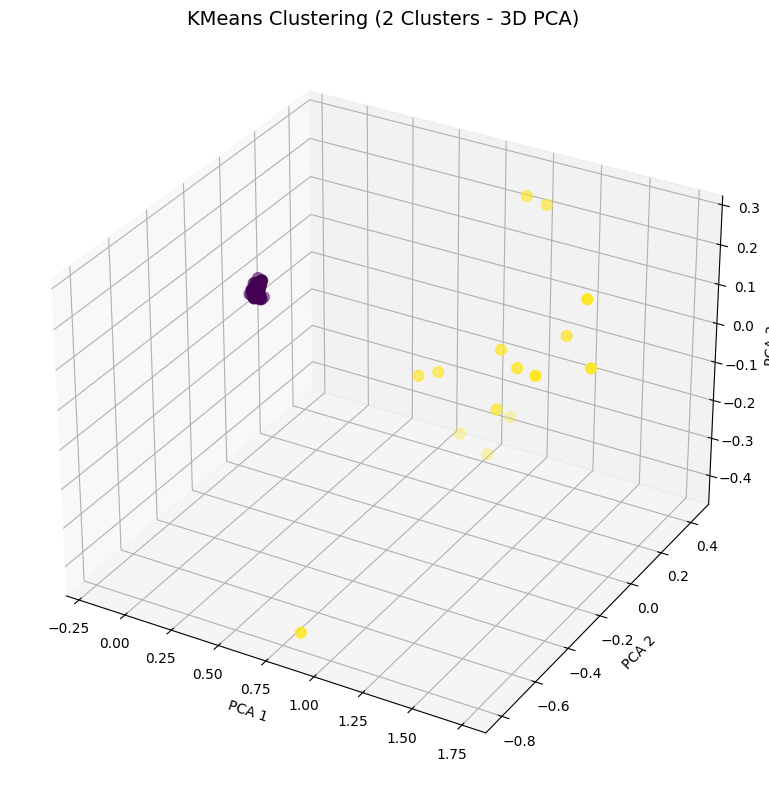

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# PCA 3D
pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(minmax_reduced_3d)

# Evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(minmax_scaled, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D (ukuran diperbesar)
fig = plt.figure(figsize=(12, 8))  # Lebar dan tinggi ditingkatkan
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
                c=labels_2, cmap='viridis', s=60)

ax.set_title("KMeans Clustering (2 Clusters - 3D PCA)", fontsize=14)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.grid(True)
plt.show()


Kode ini melakukan proses clustering menggunakan algoritma KMeans terhadap data yang sebelumnya telah dinormalisasi menggunakan MinMaxScaler dan direduksi menjadi tiga dimensi menggunakan PCA (Principal Component Analysis). Setelah proses tersebut, hasilnya divisualisasikan dalam bentuk grafik 3D untuk mempermudah pemahaman terhadap pola pengelompokan data.

Langkah awal dilakukan dengan mereduksi data minmax_scaled—yaitu data numerik yang telah dinormalisasi—menggunakan PCA ke dalam tiga dimensi. Hasilnya disimpan dalam variabel minmax_reduced_3d. Tujuannya adalah menyederhanakan data berdimensi tinggi menjadi representasi tiga dimensi yang tetap mencerminkan variasi utama dari data asli.

Selanjutnya, dilakukan clustering menggunakan algoritma KMeans dengan jumlah cluster ditentukan sebanyak 2. Objek kmeans_2 didefinisikan menggunakan parameter n_clusters=2 dan random_state=42 agar hasilnya konsisten saat diulang, serta n_init=10 untuk mencoba beberapa inisialisasi pusat cluster sehingga dapat menghindari solusi sub-optimal. Hasil pemodelan ini memberikan label cluster untuk setiap titik data, yang disimpan dalam labels_2.

Untuk mengevaluasi hasil clustering, digunakan dua metrik utama:

Inertia, yaitu total jarak kuadrat antara setiap titik dan pusat clusternya. Nilai yang lebih rendah menunjukkan cluster yang lebih rapat.

Silhouette Score, yang mengukur kualitas pemisahan antar cluster. Skor berkisar antara -1 hingga 1, dengan nilai yang lebih mendekati 1 menunjukkan pemisahan cluster yang lebih jelas dan konsisten.

Kedua metrik tersebut dicetak ke layar menggunakan print.

Langkah terakhir adalah visualisasi hasil clustering menggunakan scatter plot 3D dengan bantuan Axes3D dari matplotlib. Grafik ditampilkan dalam ukuran besar (figsize=(12, 8)) agar lebih mudah dilihat. Setiap titik dalam grafik diberi warna sesuai label clusternya (c=labels_2) menggunakan skema warna 'viridis'. Label sumbu dan judul ditambahkan untuk memperjelas isi grafik, dan plt.tight_layout() digunakan untuk memastikan elemen grafik tidak saling bertindihan.

Visualisasi ini memudahkan dalam melihat pembagian data ke dalam dua cluster berdasarkan hasil reduksi PCA dan pemodelan KMeans, serta mengidentifikasi pola atau kelompok yang mungkin muncul dari data.

## Clustering + Visualisasi (3 Cluster)

[3 Clusters] Inertia: 2.59, Silhouette Score: 0.8925


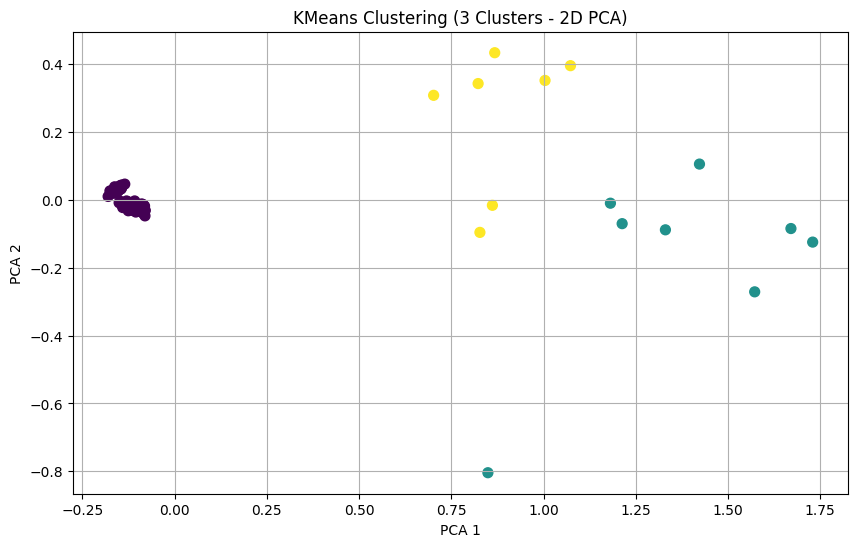

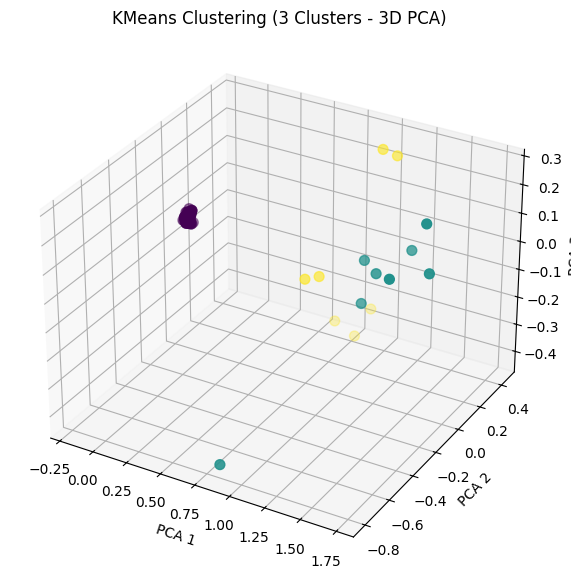

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Untuk plotting 3D

# PCA 2D (jika belum dilakukan sebelumnya)
pca_2d = PCA(n_components=2)
minmax_reduced_2d = pca_2d.fit_transform(minmax_scaled)

# PCA 3D
pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(minmax_scaled)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(minmax_scaled, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 2D
plt.figure(figsize=(10, 6))
plt.scatter(minmax_reduced_2d[:, 0], minmax_reduced_2d[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters - 2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
                c=labels_3, cmap='viridis', s=50)

ax.set_title("KMeans Clustering (3 Clusters - 3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


Kode ini menerapkan algoritma KMeans dengan jumlah 3 cluster pada data yang sebelumnya telah dinormalisasi menggunakan MinMaxScaler, kemudian direduksi menggunakan PCA ke dalam bentuk dua dan tiga dimensi. Tujuan dari proses ini adalah untuk mengidentifikasi pola tersembunyi dalam data melalui clustering dan memvisualisasikan hasilnya secara intuitif.

Langkah pertama adalah melakukan reduksi dimensi pada data minmax_scaled (hasil normalisasi fitur numerik). Dua proses PCA dijalankan secara terpisah: satu untuk mereduksi data ke dalam 2 dimensi (minmax_reduced_2d), dan satu lagi untuk 3 dimensi (minmax_reduced_3d). Reduksi ini bertujuan untuk mempertahankan karakteristik utama data dalam bentuk yang lebih sederhana sehingga lebih mudah dianalisis dan divisualisasikan.

Selanjutnya, dilakukan proses clustering KMeans dengan 3 cluster melalui objek kmeans_3. Parameter random_state=42 digunakan agar hasil yang diperoleh dapat direproduksi, dan n_init=10 menandakan bahwa algoritma akan menjalankan proses inisialisasi sebanyak 10 kali dengan posisi pusat cluster berbeda, kemudian memilih hasil dengan inertia terkecil. Hasil clustering berupa label untuk setiap data disimpan dalam labels_3.

Untuk menilai kualitas hasil clustering, digunakan dua metrik evaluasi:

Inertia, yaitu total jarak kuadrat antara setiap data dan pusat clusternya. Nilai lebih kecil menunjukkan bahwa data lebih dekat ke pusat cluster masing-masing.

Silhouette Score, yang menilai seberapa baik setiap data cocok berada dalam clusternya dibandingkan dengan cluster lain. Nilai mendekati 1 menunjukkan bahwa data berada dalam cluster yang terdefinisi dengan baik.

Setelah evaluasi, hasil clustering divisualisasikan dalam dua bentuk:

Visualisasi 2D dilakukan menggunakan data minmax_reduced_2d, di mana tiap titik ditampilkan pada bidang dua dimensi dan diberi warna sesuai dengan cluster-nya.

Visualisasi 3D menggunakan minmax_reduced_3d, dengan bantuan modul Axes3D, sehingga tiap titik dapat ditampilkan dalam ruang tiga dimensi berdasarkan hasil PCA, dan pewarnaan menunjukkan hasil pengelompokan.

Melalui pendekatan ini, pengguna dapat melihat secara visual bagaimana data yang telah dinormalisasi dan direduksi dapat dikelompokkan menjadi tiga cluster yang mungkin merepresentasikan tiga kategori atau kelas dalam data, seperti spesies bunga Iris. Evaluasi metrik serta tampilan grafik memberikan pemahaman yang lebih dalam terhadap kualitas dan struktur dari hasil clustering yang diperoleh.









## Clustering + Visualisasi (4 Cluster)

[4 Clusters] Inertia: 1.87, Silhouette Score: 0.8968


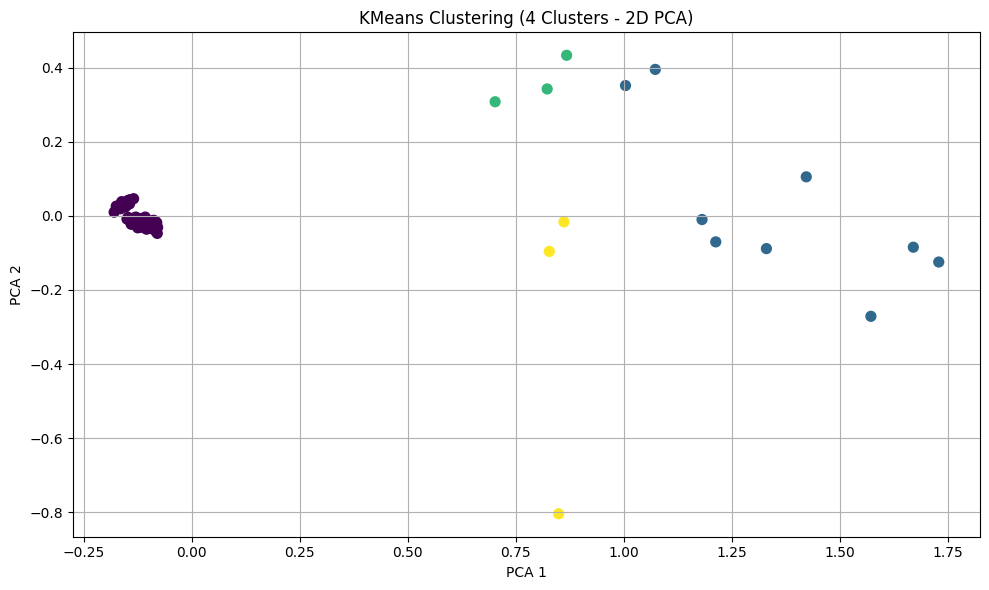

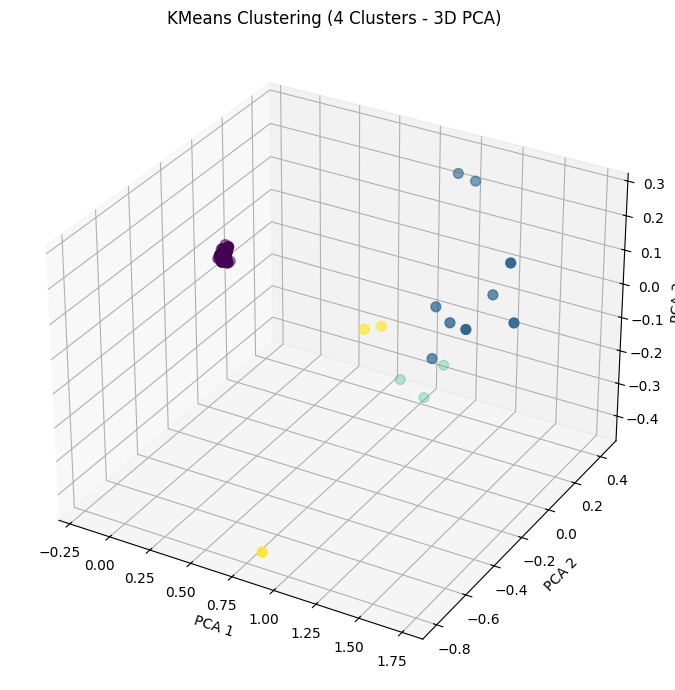

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA 2D dan 3D
pca_2d = PCA(n_components=2)
minmax_reduced_2d = pca_2d.fit_transform(minmax_scaled)

pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(minmax_scaled)

# Evaluasi
inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(minmax_scaled, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.2f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 2D (ukuran diperbesar)
plt.figure(figsize=(10, 6))  # Lebar ditambah
plt.scatter(minmax_reduced_2d[:, 0], minmax_reduced_2d[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters - 2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi 3D (ukuran diperbesar)
fig = plt.figure(figsize=(10, 7))  # Lebar ditambah
ax = fig.add_subplot(111, projection='3d')
ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
           c=labels_4, cmap='viridis', s=50)

ax.set_title("KMeans Clustering (4 Clusters - 3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.grid(True)
plt.show()


Kode ini melakukan proses clustering menggunakan KMeans dengan 4 cluster terhadap data yang telah dinormalisasi menggunakan MinMaxScaler, kemudian direduksi dimensinya menjadi 2D dan 3D menggunakan teknik PCA (Principal Component Analysis). Tujuan utamanya adalah untuk mengidentifikasi pola pengelompokan dalam data dan menampilkannya secara visual agar lebih mudah dianalisis.

Langkah pertama adalah menerapkan PCA pada data minmax_scaled, yaitu data numerik yang telah dinormalisasi. Reduksi dilakukan dalam dua versi: ke dalam dua dimensi (minmax_reduced_2d) dan tiga dimensi (minmax_reduced_3d), dengan menggunakan PCA(n_components=2) dan PCA(n_components=3). PCA bertujuan merangkum informasi penting dari data berdimensi tinggi ke dimensi yang lebih rendah, memudahkan proses visualisasi tanpa kehilangan terlalu banyak variasi data.

Setelah proses reduksi, diterapkan KMeans clustering dengan jumlah cluster = 4 menggunakan objek kmeans_4. Parameter random_state=42 menjamin konsistensi hasil pada setiap eksekusi, sedangkan n_init=10 mengarahkan KMeans untuk mencoba beberapa inisialisasi pusat cluster dan memilih hasil terbaik berdasarkan nilai inertia. Hasil clustering disimpan dalam labels_4, yaitu label yang menunjukkan keanggotaan cluster dari setiap data.

Evaluasi kualitas hasil pengelompokan dilakukan dengan dua metrik:

Inertia, yang mengukur jumlah kuadrat jarak antara data dan pusat clusternya. Nilai yang lebih kecil menunjukkan cluster yang lebih padat dan efisien.

Silhouette Score, yang menilai seberapa baik data terpisah antar cluster dan seberapa konsisten dalam cluster-nya sendiri. Skor mendekati 1 menandakan cluster yang terdefinisi dengan baik.

Terakhir, hasil clustering divisualisasikan dengan dua cara:

Plot 2D menggunakan minmax_reduced_2d, yang menggambarkan data dalam dua dimensi dengan pewarnaan berdasarkan label cluster.

Plot 3D dengan minmax_reduced_3d, menggunakan Axes3D dari matplotlib untuk menunjukkan distribusi data dalam ruang tiga dimensi.

Visualisasi ini memungkinkan pengguna untuk secara intuitif memahami bagaimana data terbagi dalam empat kelompok. Jika hasilnya menunjukkan silhouette score rendah atau tumpang tindih antar cluster dalam visualisasi, itu bisa menjadi indikasi bahwa pemilihan jumlah cluster belum optimal.